# GWP 2 Python Script for downlading and analyzing the data

Group members are-


*   Christopher Enny Ofikwu, Nigeria, c.ofikwu@outlook.com
*   Bharat Swami, India, bharatswami1299@gmail.com
*   Chengjie Wang, China, cjay-wang@hotmail.com







**STUDENT A ILLUSTRATION**

Plot S&P 500 prices (use Yahoo Finance data via yfinance in Python) and highlight periods of sustained upward trends (e.g., 2013–2015).

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


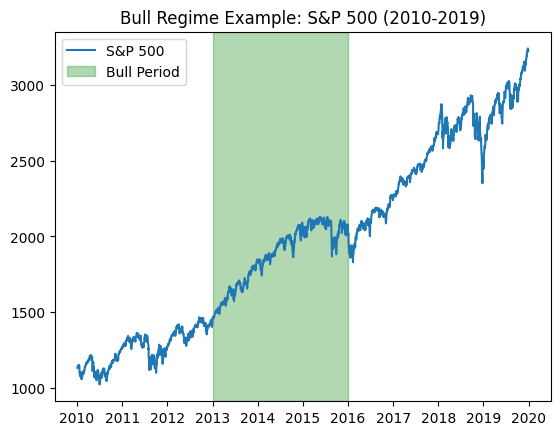

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
sp500 = yf.download('^GSPC', start='2010-01-01', end='2019-12-31')
plt.plot(sp500['Close'], label='S&P 500')
plt.title('Bull Regime Example: S&P 500 (2010-2019)')
plt.axvspan('2013-01-01', '2015-12-31', alpha=0.3, color='green', label='Bull Period')
plt.legend()
plt.show()

**STUDENT B**
Illustration: Plot S&P 500 prices for 2007–2009, highlighting the sharp decline

[*********************100%***********************]  1 of 1 completed


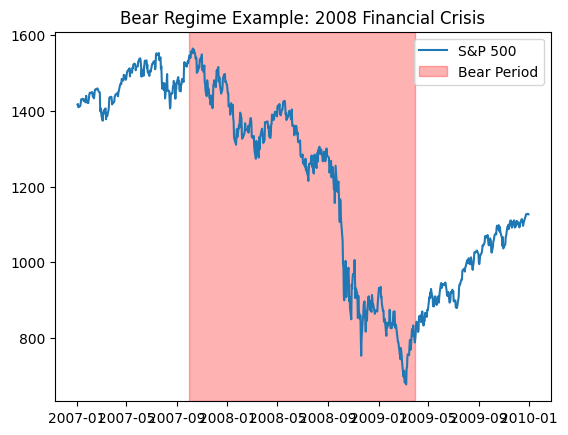

In [ ]:
sp500 = yf.download('^GSPC', start='2007-01-01', end='2009-12-31')
plt.plot(sp500['Close'], label='S&P 500')
plt.title('Bear Regime Example: 2008 Financial Crisis')
plt.axvspan('2007-10-01', '2009-03-31', alpha=0.3, color='red', label='Bear Period')
plt.legend()
plt.show()

**Student C: Stagnant Regimes**

A stagnant regime shows low volatility, minimal price movement, and indecision in the market.

[*********************100%***********************]  1 of 1 completed


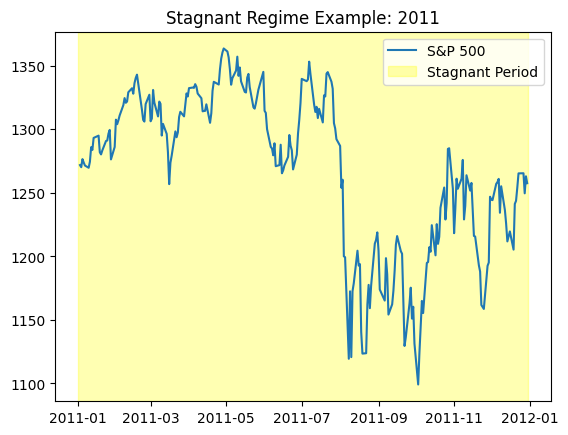

In [ ]:
sp500 = yf.download('^GSPC', start='2011-01-01', end='2011-12-31')
plt.plot(sp500['Close'], label='S&P 500')
plt.title('Stagnant Regime Example: 2011')
plt.axvspan('2011-01-01', '2011-12-31', alpha=0.3, color='yellow', label='Stagnant Period')
plt.legend()
plt.show()

### PGMPY example

Below is the code we will use in next GWP for our result. This will give us DAG for our data, which will be helpful for our analysis.

In [ ]:
!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
import pandas as pd
import numpy as np

# Simulate toy macroeconomic data
np.random.seed(42)
n_samples = 5000

data = pd.DataFrame({
    'GDP': np.random.normal(3.0, 1.0, n_samples),
    'Inflation': np.random.normal(2.0, 0.5, n_samples),
    'Oil_Price': np.random.normal(60, 10, n_samples),
    'Stock_Index': np.random.normal(250, 200, n_samples)
})

# Let's add some artificial dependencies
data['Oil_Price'] += 0.7 * data['GDP'] - 0.5 * data['Inflation']
data['Stock_Index'] += 0.2 * data['GDP'] + 0.3 * data['Oil_Price']


In [ ]:
data.corr()

GDP  Inflation  Oil_Price  Stock_Index
GDP          1.000000  -0.001805   0.066914     0.003423
Inflation   -0.001805   1.000000  -0.031127    -0.014629
Oil_Price    0.066914  -0.031127   1.000000     0.028819
Stock_Index  0.003423  -0.014629   0.028819     1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GDP          5000 non-null   float64
 1   Inflation    5000 non-null   float64
 2   Oil_Price    5000 non-null   float64
 3   Stock_Index  5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


In [ ]:
data.head()

GDP  Inflation  Oil_Price  Stock_Index
0  3.496714   1.788120  54.768693   238.445307
1  2.861736   1.773293  58.061574   261.459639
2  3.647689   1.102178  56.028482   280.397058
3  4.523030   1.834955  63.352824   459.282745
4  2.765847   2.366415  72.724671   122.927109

In [ ]:
from pgmpy.estimators import HillClimbSearch, BIC

# Define the scoring method
scoring = BIC(data)

# Define the structure search algorithm
hc = HillClimbSearch(data)

# Estimate the best model structure
best_model = hc.estimate(scoring_method='aic-cg')

# Show learned edges
print("Learned edges:", best_model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned edges: [('GDP', 'Oil_Price'), ('Oil_Price', 'Inflation'), ('Oil_Price', 'Stock_Index')]


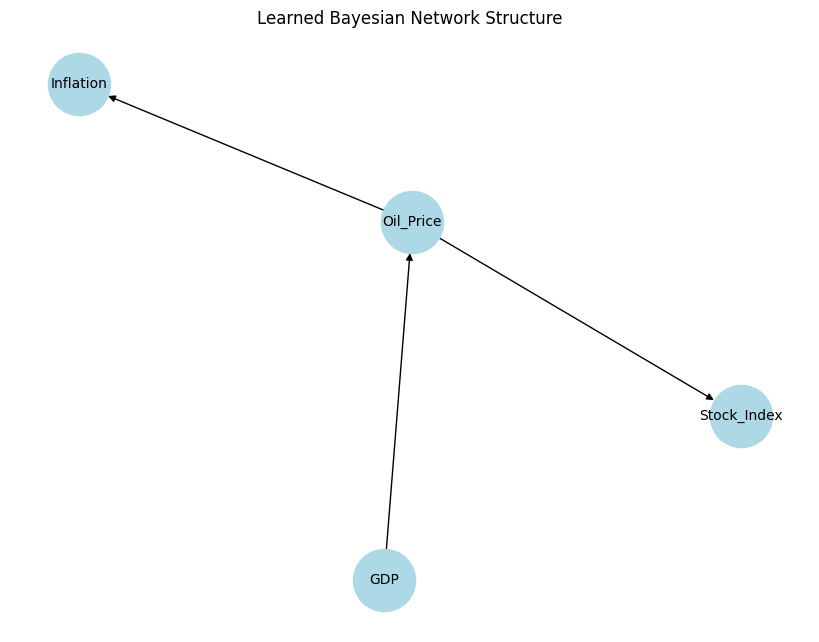

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert to a NetworkX DiGraph
G = nx.DiGraph(best_model.edges())

# Draw the graph
plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_size=2000, node_color='lightblue', font_size=10)
plt.title("Learned Bayesian Network Structure")
plt.show()


## Complete dataset

We have run the required script as described in the notebook from the GWP1 and saved the data into "complete_data" folder, shared in attached zip file.